# TOPSIS: Technique for Order Preference by Similarity to Ideal Solution

**Author:** Vani Goyal  
**Roll Number:** 102303078  
**Email:** vgoyal_be23@thapar.edu

---

## What is TOPSIS?

TOPSIS is a multi-criteria decision analysis method that identifies the best alternative by:
1. Calculating the geometric distance from the **ideal solution** (best possible)
2. Calculating the geometric distance from the **negative-ideal solution** (worst possible)
3. Choosing the alternative closest to the ideal and farthest from the negative-ideal

## Algorithm Steps

1. **Normalization**: Convert decision matrix to comparable scales
2. **Weighted Normalization**: Apply criterion weights
3. **Ideal Solutions**: Identify ideal best and worst
4. **Distance Calculation**: Calculate Euclidean distances
5. **TOPSIS Score**: Calculate closeness coefficient
6. **Ranking**: Rank alternatives

In [4]:
# Install required packages
!pip install pandas numpy matplotlib seaborn openpyxl -q

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styling
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Step 1: Load and Explore Data

In [6]:
# Upload your data.xlsx or data.csv file here
# For Colab, use:
# from google.colab import files
# uploaded = files.upload()

# Load data
df = pd.read_csv('data.csv')  # or pd.read_excel('data.xlsx')
print("Original Data:")
print(df)
print(f"\nShape: {df.shape}")
print(f"\nData Types:\n{df.dtypes}")

Original Data:
  Fund Name    P1    P2   P3    P4     P5
0        M1  0.84  0.71  6.7  42.1  12.59
1        M2  0.91  0.83  7.0  31.7  10.11
2        M3  0.79  0.62  4.8  46.7  13.23
3        M4  0.78  0.61  6.4  42.4  12.55
4        M5  0.94  0.88  3.6  62.2  16.91
5        M6  0.88  0.77  6.5  51.5  14.91
6        M7  0.66  0.44  5.3  48.9  13.83
7        M8  0.93  0.86  3.4  37.0  10.55

Shape: (8, 6)

Data Types:
Fund Name     object
P1           float64
P2           float64
P3           float64
P4           float64
P5           float64
dtype: object


## Step 2: TOPSIS Implementation

### Mathematical Formulation

Given:
- Decision matrix $X$ with $m$ alternatives and $n$ criteria
- Weight vector $W = [w_1, w_2, ..., w_n]$
- Impact vector $I = [i_1, i_2, ..., i_n]$ where $i_j \in \{+, -\}$

#### Step 2.1: Normalization

$$r_{ij} = \frac{x_{ij}}{\sqrt{\sum_{k=1}^{m} x_{kj}^2}}$$

#### Step 2.2: Weighted Normalized Matrix

$$v_{ij} = w_j \times r_{ij}$$

#### Step 2.3: Ideal Solutions

$$V^+ = \{v_1^+, v_2^+, ..., v_n^+\}$$
$$V^- = \{v_1^-, v_2^-, ..., v_n^-\}$$

where:
- $v_j^+ = \max(v_{ij})$ if benefit criterion, $\min(v_{ij})$ if cost criterion
- $v_j^- = \min(v_{ij})$ if benefit criterion, $\max(v_{ij})$ if cost criterion

#### Step 2.4: Euclidean Distance

$$S_i^+ = \sqrt{\sum_{j=1}^{n}(v_{ij} - v_j^+)^2}$$
$$S_i^- = \sqrt{\sum_{j=1}^{n}(v_{ij} - v_j^-)^2}$$

#### Step 2.5: TOPSIS Score

$$C_i = \frac{S_i^-}{S_i^+ + S_i^-}$$

Higher $C_i$ indicates better alternative.

In [7]:
def topsis_detailed(df, weights, impacts):
    """
    Perform TOPSIS with detailed step-by-step output

    Parameters:
    -----------
    df : DataFrame with first column as names, rest as criteria
    weights : list of weights for each criterion
    impacts : list of '+' or '-' for each criterion

    Returns:
    --------
    dict with all intermediate steps and final results
    """
    results = {}

    # Extract data
    names = df.iloc[:, 0].values
    data = df.iloc[:, 1:].values.astype(float)
    results['original_data'] = pd.DataFrame(data, columns=df.columns[1:], index=names)

    # Step 1: Normalization
    normalized = data / np.sqrt((data ** 2).sum(axis=0))
    results['normalized'] = pd.DataFrame(normalized, columns=df.columns[1:], index=names)

    # Step 2: Weighted normalized matrix
    weighted = normalized * np.array(weights)
    results['weighted'] = pd.DataFrame(weighted, columns=df.columns[1:], index=names)

    # Step 3: Ideal best and worst
    ideal_best = []
    ideal_worst = []

    for j, impact in enumerate(impacts):
        if impact == '+':
            ideal_best.append(weighted[:, j].max())
            ideal_worst.append(weighted[:, j].min())
        else:
            ideal_best.append(weighted[:, j].min())
            ideal_worst.append(weighted[:, j].max())

    results['ideal_best'] = pd.Series(ideal_best, index=df.columns[1:])
    results['ideal_worst'] = pd.Series(ideal_worst, index=df.columns[1:])

    # Step 4: Distances
    dist_best = np.sqrt(((weighted - ideal_best) ** 2).sum(axis=1))
    dist_worst = np.sqrt(((weighted - ideal_worst) ** 2).sum(axis=1))

    results['distances'] = pd.DataFrame({
        'Distance from Best': dist_best,
        'Distance from Worst': dist_worst
    }, index=names)

    # Step 5: TOPSIS Score
    scores = dist_worst / (dist_best + dist_worst)
    results['scores'] = pd.Series(scores, index=names)

    # Step 6: Ranking
    ranks = scores.argsort()[::-1].argsort() + 1
    results['ranks'] = pd.Series(ranks, index=names)

    # Final result
    final = df.copy()
    final['Topsis Score'] = (scores * 100).round(2)
    final['Rank'] = ranks
    results['final'] = final

    return results

In [8]:
# Define parameters
weights = [1, 1, 1, 1, 1]  # Equal weights
impacts = ['+', '+', '-', '+', '+']  # + means maximize, - means minimize

print("Parameters:")
print(f"Weights: {weights}")
print(f"Impacts: {impacts}")
print(f"\nInterpretation:")
for i, col in enumerate(df.columns[1:]):
    impact_text = "maximize (higher is better)" if impacts[i] == '+' else "minimize (lower is better)"
    print(f"  {col}: Weight={weights[i]}, {impact_text}")

Parameters:
Weights: [1, 1, 1, 1, 1]
Impacts: ['+', '+', '-', '+', '+']

Interpretation:
  P1: Weight=1, maximize (higher is better)
  P2: Weight=1, maximize (higher is better)
  P3: Weight=1, minimize (lower is better)
  P4: Weight=1, maximize (higher is better)
  P5: Weight=1, maximize (higher is better)


In [9]:
# Run TOPSIS
results = topsis_detailed(df, weights, impacts)

print("="*80)
print("TOPSIS ANALYSIS - DETAILED RESULTS")
print("="*80)

TOPSIS ANALYSIS - DETAILED RESULTS


## Step 3: View Intermediate Results

In [10]:
print("\n1. NORMALIZED MATRIX")
print("="*80)
print(results['normalized'].round(4))


1. NORMALIZED MATRIX
        P1      P2      P3      P4      P5
M1  0.3511  0.3444  0.4214  0.3225  0.3360
M2  0.3803  0.4026  0.4403  0.2429  0.2698
M3  0.3302  0.3007  0.3019  0.3578  0.3531
M4  0.3260  0.2959  0.4026  0.3248  0.3349
M5  0.3929  0.4269  0.2264  0.4765  0.4513
M6  0.3678  0.3735  0.4089  0.3946  0.3979
M7  0.2758  0.2134  0.3334  0.3746  0.3691
M8  0.3887  0.4172  0.2139  0.2835  0.2816


In [11]:
print("\n2. WEIGHTED NORMALIZED MATRIX")
print("="*80)
print(results['weighted'].round(4))


2. WEIGHTED NORMALIZED MATRIX
        P1      P2      P3      P4      P5
M1  0.3511  0.3444  0.4214  0.3225  0.3360
M2  0.3803  0.4026  0.4403  0.2429  0.2698
M3  0.3302  0.3007  0.3019  0.3578  0.3531
M4  0.3260  0.2959  0.4026  0.3248  0.3349
M5  0.3929  0.4269  0.2264  0.4765  0.4513
M6  0.3678  0.3735  0.4089  0.3946  0.3979
M7  0.2758  0.2134  0.3334  0.3746  0.3691
M8  0.3887  0.4172  0.2139  0.2835  0.2816


In [12]:
print("\n3. IDEAL SOLUTIONS")
print("="*80)
print("\nIdeal Best (V+):")
print(results['ideal_best'].round(4))
print("\nIdeal Worst (V-):")
print(results['ideal_worst'].round(4))


3. IDEAL SOLUTIONS

Ideal Best (V+):
P1    0.3929
P2    0.4269
P3    0.2139
P4    0.4765
P5    0.4513
dtype: float64

Ideal Worst (V-):
P1    0.2758
P2    0.2134
P3    0.4403
P4    0.2429
P5    0.2698
dtype: float64


In [13]:
print("\n4. EUCLIDEAN DISTANCES")
print("="*80)
print(results['distances'].round(4))


4. EUCLIDEAN DISTANCES
    Distance from Best  Distance from Worst
M1              0.2977               0.1841
M2              0.3736               0.2161
M3              0.2266               0.2233
M4              0.3062               0.1473
M5              0.0126               0.4388
M6              0.2260               0.2729
M7              0.3011               0.1966
M8              0.2573               0.3276


## Step 4: Final Results

In [14]:
print("\n5. FINAL TOPSIS SCORES AND RANKINGS")
print("="*80)
print(results['final'].sort_values('Rank'))


5. FINAL TOPSIS SCORES AND RANKINGS
  Fund Name    P1    P2   P3    P4     P5  Topsis Score  Rank
4        M5  0.94  0.88  3.6  62.2  16.91         97.21     1
7        M8  0.93  0.86  3.4  37.0  10.55         56.01     2
5        M6  0.88  0.77  6.5  51.5  14.91         54.70     3
2        M3  0.79  0.62  4.8  46.7  13.23         49.64     4
6        M7  0.66  0.44  5.3  48.9  13.83         39.50     5
0        M1  0.84  0.71  6.7  42.1  12.59         38.21     6
1        M2  0.91  0.83  7.0  31.7  10.11         36.65     7
3        M4  0.78  0.61  6.4  42.4  12.55         32.48     8


## Step 5: Visualizations

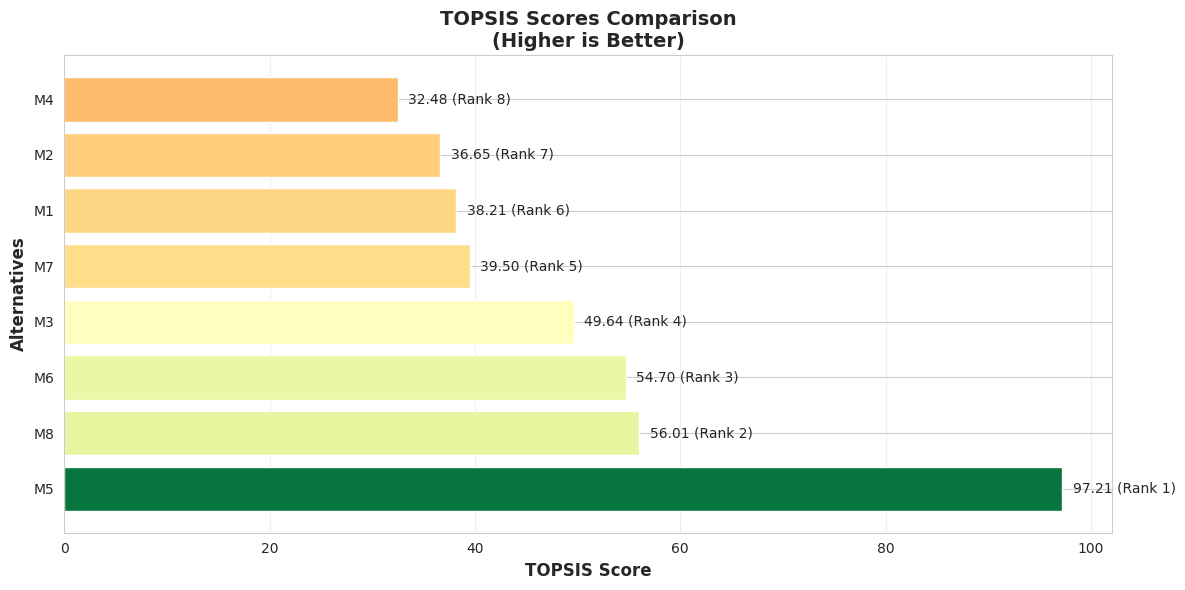

In [15]:
# Visualization 1: TOPSIS Scores Bar Chart
fig, ax = plt.subplots(figsize=(12, 6))

sorted_data = results['final'].sort_values('Rank')
colors = plt.cm.RdYlGn(sorted_data['Topsis Score'] / 100)

bars = ax.barh(sorted_data.iloc[:, 0], sorted_data['Topsis Score'], color=colors)
ax.set_xlabel('TOPSIS Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Alternatives', fontsize=12, fontweight='bold')
ax.set_title('TOPSIS Scores Comparison\n(Higher is Better)', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(sorted_data.iterrows()):
    ax.text(row['Topsis Score'] + 1, i, f"{row['Topsis Score']:.2f} (Rank {int(row['Rank'])})",
            va='center', fontsize=10)

plt.tight_layout()
plt.show()

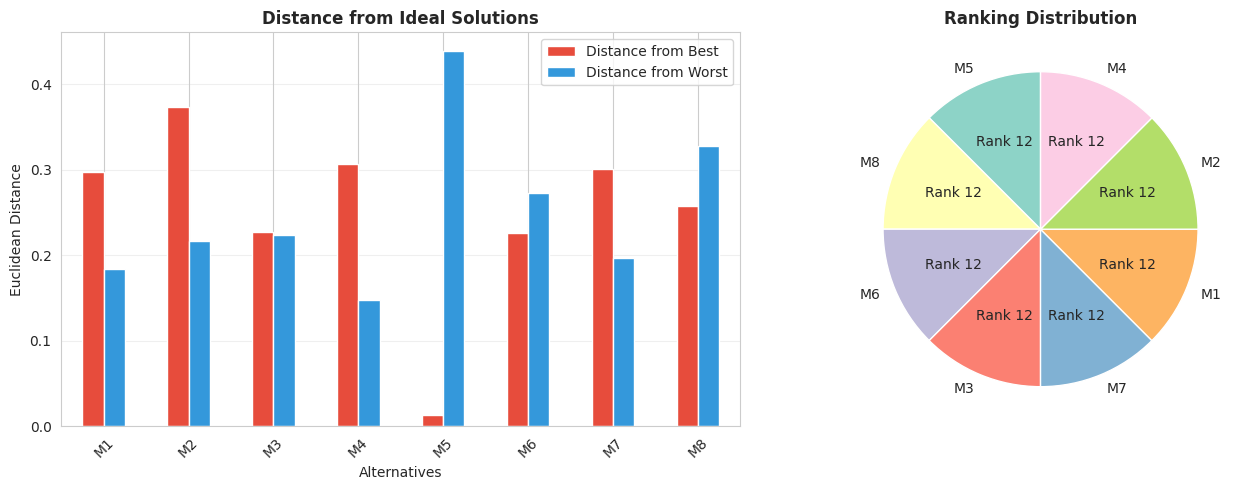

In [16]:
# Visualization 2: Distance Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Distance comparison
results['distances'].plot(kind='bar', ax=axes[0], color=['#e74c3c', '#3498db'])
axes[0].set_title('Distance from Ideal Solutions', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Alternatives', fontsize=10)
axes[0].set_ylabel('Euclidean Distance', fontsize=10)
axes[0].legend(['Distance from Best', 'Distance from Worst'])
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Right: Rank distribution
rank_counts = results['final']['Rank'].value_counts().sort_index()
axes[1].pie([1]*len(rank_counts), labels=results['final'].sort_values('Rank').iloc[:, 0],
           autopct='Rank %d', startangle=90, colors=plt.cm.Set3.colors)
axes[1].set_title('Ranking Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

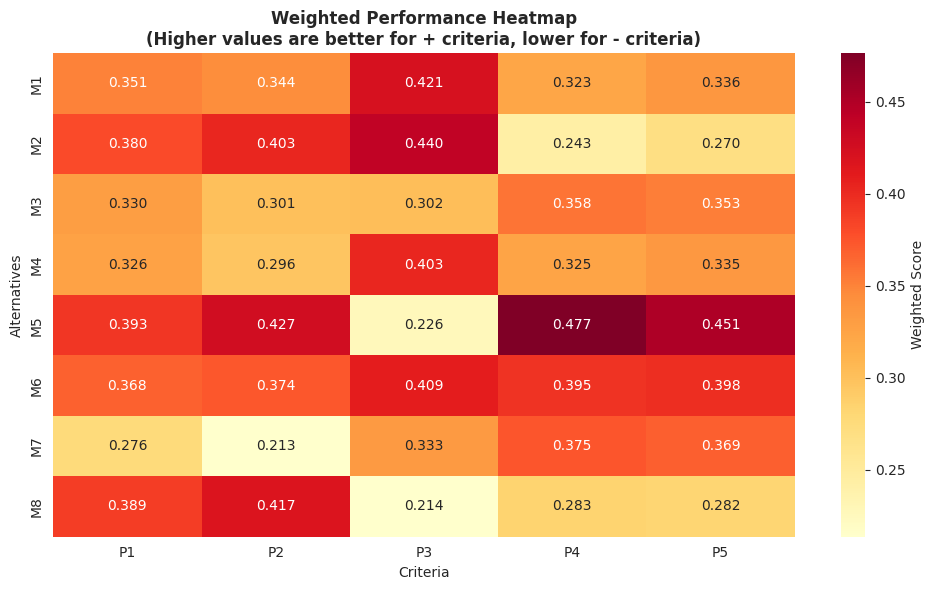

In [17]:
# Visualization 3: Criteria Performance Heatmap
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(results['weighted'], annot=True, fmt='.3f', cmap='YlOrRd',
            cbar_kws={'label': 'Weighted Score'}, ax=ax)
ax.set_title('Weighted Performance Heatmap\n(Higher values are better for + criteria, lower for - criteria)',
            fontsize=12, fontweight='bold')
ax.set_xlabel('Criteria', fontsize=10)
ax.set_ylabel('Alternatives', fontsize=10)

plt.tight_layout()
plt.show()

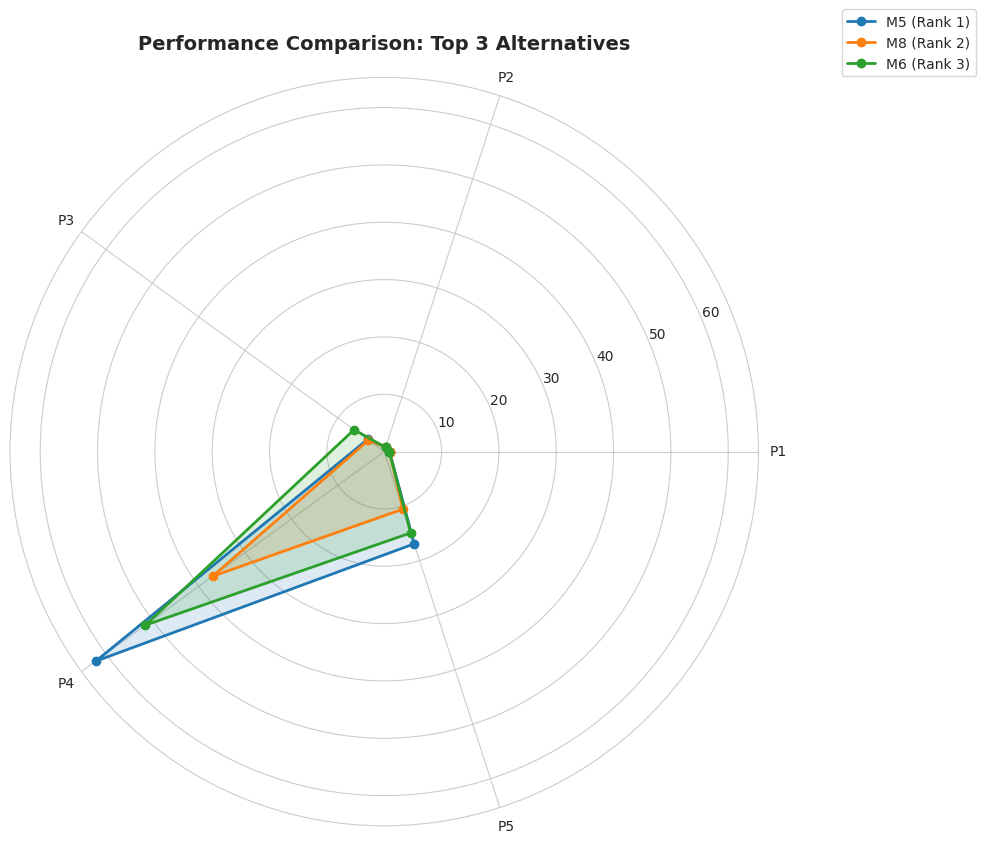

In [18]:
# Visualization 4: Radar Chart for Top 3 Alternatives
from math import pi

top3 = results['final'].nsmallest(3, 'Rank')
categories = list(df.columns[1:])
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

for idx, row in top3.iterrows():
    values = row[1:-2].tolist()  # Get criteria values
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=f"{row.iloc[0]} (Rank {int(row['Rank'])})")
    ax.fill(angles, values, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Performance Comparison: Top 3 Alternatives', size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

## Step 6: Statistical Summary

In [19]:
print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)

print("\nTOPSIS Score Statistics:")
print(results['final']['Topsis Score'].describe())

print("\n\nBest Alternative:")
best = results['final'].loc[results['final']['Rank'] == 1]
print(f"  Name: {best.iloc[0, 0]}")
print(f"  Score: {best.iloc[0, -2]:.2f}")
print(f"  Rank: {int(best.iloc[0, -1])}")

print("\n\nWorst Alternative:")
worst = results['final'].loc[results['final']['Rank'] == len(df)]
print(f"  Name: {worst.iloc[0, 0]}")
print(f"  Score: {worst.iloc[0, -2]:.2f}")
print(f"  Rank: {int(worst.iloc[0, -1])}")

print("\n\nScore Range:")
print(f"  Maximum: {results['final']['Topsis Score'].max():.2f}")
print(f"  Minimum: {results['final']['Topsis Score'].min():.2f}")
print(f"  Range: {results['final']['Topsis Score'].max() - results['final']['Topsis Score'].min():.2f}")
print(f"  Mean: {results['final']['Topsis Score'].mean():.2f}")
print(f"  Std Dev: {results['final']['Topsis Score'].std():.2f}")


STATISTICAL SUMMARY

TOPSIS Score Statistics:
count     8.000000
mean     50.550000
std      20.767869
min      32.480000
25%      37.820000
50%      44.570000
75%      55.027500
max      97.210000
Name: Topsis Score, dtype: float64


Best Alternative:
  Name: M5
  Score: 97.21
  Rank: 1


Worst Alternative:
  Name: M4
  Score: 32.48
  Rank: 8


Score Range:
  Maximum: 97.21
  Minimum: 32.48
  Range: 64.73
  Mean: 50.55
  Std Dev: 20.77


## Step 7: Save Results

In [20]:
# Save to CSV
results['final'].to_csv('result.csv', index=False)
print("Results saved to 'result.csv'")

# Download file (for Colab)
# from google.colab import files
# files.download('result.csv')

Results saved to 'result.csv'


## Conclusion

### Key Findings:

1. **Best Alternative**: The alternative with the highest TOPSIS score is closest to the ideal solution
2. **Worst Alternative**: The alternative with the lowest TOPSIS score is farthest from the ideal solution
3. **Score Distribution**: Provides insights into how well alternatives are separated

### Methodology Summary:

- **Normalization** ensures all criteria are on comparable scales
- **Weighted scores** reflect the relative importance of each criterion
- **Distance measures** quantify similarity to ideal solutions
- **TOPSIS score** provides a comprehensive performance metric

### Advantages of TOPSIS:

1. Simple and intuitive methodology
2. Considers both ideal and anti-ideal solutions
3. Suitable for any number of alternatives and criteria
4. Provides clear ranking of alternatives
5. Computationally efficient

---

**Note**: This analysis can be customized by changing the weights and impacts according to your specific requirements.